# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from time import time
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

# Loading Original Data Set

In [2]:
df = pd.read_csv('desktop/Reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# Loading the cleaned and processed data

In [4]:
final_data = pd.read_csv('final_data.csv')

In [5]:
final_data

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity,Class_Labels,CleanedText,CleanedText_NoStem,CleanedSummary,Combined_Reviews
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1,bought sever vital can dog food product found ...,bought several vitality canned dog food produc...,good qualiti dog food,bought sever vital can dog food product found ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0,product arriv label jumbo salt peanut peanut a...,product arrived labeled jumbo salted peanuts p...,not advertis,product arriv label jumbo salt peanut peanut a...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1,confect around centuri light pillowi citrus ge...,confection around centuries light pillowy citr...,delight say all,confect around centuri light pillowi citrus ge...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0,look secret ingredi robitussin believ found go...,looking secret ingredient robitussin believe f...,cough medicin,look secret ingredi robitussin believ found go...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,1,great taffi great price wide assort yummi taff...,great taffy great price wide assortment yummy ...,great taffi,great taffi great price wide assort yummi taff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364166,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,1,great sesam chicken good not better restur eat...,great sesame chicken good not better resturant...,will not without,great sesam chicken good not better restur eat...
364167,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,0,disappoint flavor chocol note especi weak milk...,disappointed flavor chocolate notes especially...,disappoint,disappoint flavor chocol note especi weak milk...
364168,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,1,star small give one train session tri train do...,stars small give one training session tried tr...,perfect for our maltipoo,star small give one train session tri train do...
364169,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,1,best treat train reward dog good groom lower c...,best treats training rewarding dog good groomi...,favorit train and reward treat,best treat train reward dog good groom lower c...


In [6]:
final_data.describe()

,Unnamed: 0,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Class_Labels
count,364171.000000,364171.000000,364171.000000,364171.000000,364171.000000,3.641710e+05,364171.000000
mean,261813.561014,261814.561014,1.739021,2.186841,4.275796,1.296135e+09,0.843178
std,166958.768333,166958.768333,6.723921,7.348482,1.318650,4.864772e+07,0.363633
min,0.000000,1.000000,0.000000,0.000000,1.000000,9.393408e+08,0.000000
25%,113378.500000,113379.500000,0.000000,0.000000,4.000000,1.270858e+09,1.000000
50%,249444.000000,249445.000000,0.000000,1.000000,5.000000,1.311379e+09,1.000000
75%,407407.500000,407408.500000,2.000000,2.000000,5.000000,1.332893e+09,1.000000
max,568453.000000,568454.000000,866.000000,878.000000,5.000000,1.351210e+09,1.000000


In [7]:
final_data.shape
final_data['Score'].size

364171

In [8]:
def polarity(x):
    if x == "Positive":
        return 0
    else:
        return 1
final_data["Score"] = final_data["Score"].map(polarity) #Map all the scores as the function polarity i.e. positive or negative
final_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity,Class_Labels,CleanedText,CleanedText_NoStem,CleanedSummary,Combined_Reviews
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1,bought sever vital can dog food product found ...,bought several vitality canned dog food produc...,good qualiti dog food,bought sever vital can dog food product found ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0,product arriv label jumbo salt peanut peanut a...,product arrived labeled jumbo salted peanuts p...,not advertis,product arriv label jumbo salt peanut peanut a...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1,confect around centuri light pillowi citrus ge...,confection around centuries light pillowy citr...,delight say all,confect around centuri light pillowi citrus ge...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0,look secret ingredi robitussin believ found go...,looking secret ingredient robitussin believe f...,cough medicin,look secret ingredi robitussin believ found go...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,1,great taffi great price wide assort yummi taff...,great taffy great price wide assortment yummy ...,great taffi,great taffi great price wide assort yummi taff...


In [9]:
#Taking Sample Data
n_samples = 25000
df_sample = final_data.sample(n_samples)

###Sorting as we want according to time series
df_sample.sort_values('Time',inplace=True) 
df_sample.head(10)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity,Class_Labels,CleanedText,CleanedText_NoStem,CleanedSummary,Combined_Reviews
63317,76881,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,1,948672000,A sure death for flies,I bought a few of these after my apartment was...,Positive,1,bought apart infest fruit fli hour trap quot a...,bought apartment infested fruit flies hours tr...,sure death for fli,bought apart infest fruit fli hour trap quot a...
169367,230375,230376,B00004RYGX,ACJR7EQF9S6FP,Jeremy Robertson,2,3,1,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,Positive,1,happen say name three time michael keaten star...,happens say name three times michael keaten st...,bettlejuic bettlejuic bettlejuic,happen say name three time michael keaten star...
169263,230264,230265,B00004RYGX,AZRJH4JFB59VC,Lynwood E. Hines,21,23,1,997228800,"Great movie, terrible DVD",I am continually amazed at the shoddy treatmen...,Negative,0,continu amaz shoddi treatment movi get dvd rel...,continually amazed shoddy treatment movies get...,great movi terribl dvd,continu amaz shoddi treatment movi get dvd rel...
316046,479722,479723,B00005U2FA,A3TO9GEQEGKFDC,"N. Smith ""emerald999""",35,35,1,1020211200,I love this thing,The wine saver is great in so many ways. Obvio...,Positive,1,wine saver great mani way obvious wonder abl o...,wine saver great many ways obviously wonderful...,love this thing,wine saver great mani way obvious wonder abl o...
169331,230336,230337,B00004RYGX,A1CAA94EOP0J2S,Travis J Smith,4,4,1,1036022400,Great Comedy,Beetlejuice is the story of ghosts (Alec Baldw...,Positive,1,beetlejuic stori ghost alec baldwin geena davi...,beetlejuice story ghosts alec baldwin geena da...,great comedi,beetlejuic stori ghost alec baldwin geena davi...
158412,213675,213676,B0000D9MXU,A3MXE8CDJX12V2,"L. M. Schulz ""domestic engineer""",3,3,1,1067644800,A Cheese the Whole Family Likes...,The description of a cross between cheddar and...,Positive,1,descript cross cheddar parmesan complet accur ...,description cross cheddar parmesan completely ...,chees the whole famili like,descript cross cheddar parmesan complet accur ...
232022,330847,330848,B0000CH4FX,A2D1KU0E3W608M,"""nhenschel4""",4,5,1,1068595200,addicting!!,"If you like Earl Grey tea, you'll find no bett...",Positive,1,like earl grey tea find better harney amp son ...,like earl grey tea find better harney amp son ...,addict,like earl grey tea find better harney amp son ...
128150,165712,165713,B0000D9N59,A3FE2GUBM8JZ3G,TestMagic Inc.,26,31,1,1073088000,One of the great cheeses of the world,The only real Parmigiano (Reggiano) is one of ...,Positive,1,real parmigiano reggiano one great chees world...,real parmigiano reggiano one great cheeses wor...,one the great chees the world,real parmigiano reggiano one great chees world...
135968,176943,176944,B0000CNU7C,A1KSJOHCUJCK2U,"stu21202 ""phallophile""",4,4,1,1073865600,It's curry-tastic!!!,I have been a fan of S&amp;B Golden Curry sinc...,Positive,1,fan amp golden curri sinc found box japantown ...,fan amp golden curry since found box japantown...,curri tastic,fan amp golden curri sinc found box japantown ...
170682,232263,232264,B0000DG58Q,AY81BBSXD7T3W,Michele,0,0,1,1074470400,PICKAPEPPA,For many years I tried various meat sauces: Am...,Positive,1,mani year tri various meat sauc american engli...,many years tried various meat sauces american ...,pickapeppa,mani year tri various meat sauc american engli...


In [10]:
#Saving 25000 samples in disk to as to test to test on the same sample for each of all Algo
savetofile(df_sample,"sample_25000_knn")

In [11]:
#Opening from samples from file
df_sample = openfromfile("sample_25000_knn")

# KNN Models using Different Featurization in NLP

## Bag of Words (BoW)
A commonly used model in methods of Text Classification. As part of the BOW model, a piece of text (sentence or a document) is represented as a bag or multiset of words, disregarding grammar and even word order and the frequency or occurrence of each word is used as a feature for training a classifier.
OR
Simply,converting a collection of text documents to a matrix of token counts.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

#Text -> Uni gram Vectors
uni_gram = CountVectorizer() 
X_train = uni_gram.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = uni_gram.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (17500, 17026)
Test Data Size:  (7500, 17026)


In [13]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(X_train):
#     print("%s %s" % (train, cv))
    print(X_train[train].shape, X_train[cv].shape)

(1600, 17026) (1590, 17026)
(3190, 17026) (1590, 17026)
(4780, 17026) (1590, 17026)
(6370, 17026) (1590, 17026)
(7960, 17026) (1590, 17026)
(9550, 17026) (1590, 17026)
(11140, 17026) (1590, 17026)
(12730, 17026) (1590, 17026)
(14320, 17026) (1590, 17026)
(15910, 17026) (1590, 17026)


## Finding the best 'k' value using Forward Chaining Cross Validation or Time Series CV
## 1. Without Grid Search CV

In [14]:
%%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier

#No of splits for Forward Chaining Cross Validation
n_splits = 10  
#Max no. of neighbours for KNN
neigh_max = 100

tscv = TimeSeriesSplit(n_splits=n_splits)
#To store accuracy of different k values
k_acc = []

for k in range(1,neigh_max,2):
    #To store accuracy of different fold
    acc_list = []
    for train, cv in tscv.split(X_train):
          if(train.size > k): 
            knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',n_jobs=-1)
            knn.fit(X_train[train],y_train[train])
            acc_list.append(knn.score(X_train[cv],y_train[cv])*100)
    if(acc_list):        
        acc_nparr = np.array(acc_list) 
    k_acc.append(acc_nparr.mean())
k_acc = np.array(k_acc)

Wall time: 7min 41s
Parser   : 133 ms


In [15]:
savetofile(k_acc,"k_acc_uni_gram")

In [16]:
k_acc_uni_gram = openfromfile("k_acc_uni_gram")
k_acc_uni_gram

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100.])

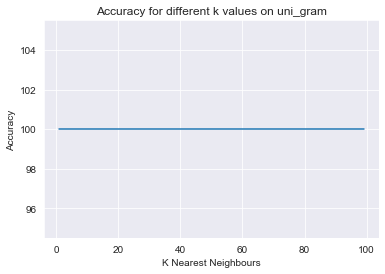

In [17]:
sns.set_style("darkgrid")
plt.plot(np.arange(1,100,2),k_acc_uni_gram)
plt.xlabel("K Nearest Neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values on uni_gram")
plt.show()

With k=11-13 uni_gram has the highest accuracy of 86%
As we can see after a no. of neighbours the accuracy dips hence the no. of neighbours is restricted to 100 neighbours

## 2. With Grid Search CV
The above code for finding best value of 'k' can be condensed using Grid Search CV it tries all the possible params which tell it to try on and returns the best params and best accuracy

## A.Brute Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(algorithm='brute')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## B. Kd tree Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='kd_tree')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100)

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11,algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


## bi-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

#taking one words and two consecutive words together
bi_gram = CountVectorizer(ngram_range=(1,2)) 
X_train = bi_gram.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = bi_gram.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

## A.Brute Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## B. Kd tree Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='kd_tree')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17,algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# tf-idf

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams
X_train = tfidf.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

## A.Brute Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## B. Kd tree Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='kd_tree')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9,algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Gensim
Gensim is a robust open-source vector space modeling and topic modeling toolkit implemented in Python. It uses NumPy, SciPy and optionally Cython for performance. Gensim is specifically designed to handle large text collections, using data streaming and efficient incremental algorithms, which differentiates it from most other scientific software packages that only target batch and in-memory processing.

## Word2Vec

In [ ]:
from gensim.models import KeyedVectors

#Loading the model from file in the disk
w2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
w2v_vocub = w2vec_model.wv.vocab
len(w2v_vocub)

## Avg Word2Vec
One of the most naive but good ways to convert a sentence into a vector
Convert all the words to vectors and then just take the avg of the vectors the resulting vector represent the sentence

In [ ]:
%%time
avg_vec_google = [] #List to store all the avg w2vec's 
# no_datapoints = 364170
# sample_cols = random.sample(range(1, no_datapoints), 20001)
for sent in df_sample['CleanedText_NoStem']:
    cnt = 0 #to count no of words in each reviews
    sent_vec = np.zeros(300) #Initializing with zeroes
#     print("sent:",sent) 
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
#             print(word)
            wvec = w2vec_model.wv[word] #Vector of each using w2v model
#             print("wvec:",wvec)
            sent_vec += wvec #Adding the vectors
#             print("sent_vec:",sent_vec)
            cnt += 1
        except: 
            pass #When the word is not in the dictionary then do nothing  
#     print(sent_vec)
    sent_vec /= cnt #Taking average of vectors sum of the particular review
#     print("avg_vec:",sent_vec)
    avg_vec_google.append(sent_vec) #Storing the avg w2vec's for each review
#     print("*******************************************************************")
# print(avg_vec_google)
avg_vec_google = np.array(avg_vec_google)

In [ ]:
np.isnan(avg_vec_google).any()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

avg_vec_norm = preprocessing.normalize(avg_vec_google)

#Not shuffling the data as we want it on time basis
X_train, X_test, y_train, y_test = train_test_split(avg_vec_norm,df_sample['Score'].values,test_size=0.3,shuffle=False)

In [ ]:
avg_vec_norm.shape

In [ ]:
avg_vec_norm.max()

## A.Brute Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,40,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## B. Kd tree Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='kd_tree')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,40,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11,algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## Tf-idf W2Vec
1. Another way to covert sentence into vectors
2. Take weighted sum of the vectors divided by the sum of all the tfidf's
i.e. (tfidf(word) x w2v(word))/sum(tfidf's)

In [ ]:
%%time
###Sorting as we want according to time series
df_sample.sort_values('Time',inplace=True) 

###tf-idf with No Stemming
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams

tfidf_vec_new = tfidf.fit_transform(df_sample['CleanedText_NoStem'].values)

print(tfidf_vec_new.shape)

features = tfidf.get_feature_names()

In [ ]:
%%time
tfidf_w2v_vec_google = []
review = 0

for sent in df_sample['CleanedText_NoStem'].values:
    cnt = 0 
    weighted_sum  = 0
    sent_vec = np.zeros(300)
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
#             print(word)
            wvec = w2vec_model.wv[word] #Vector of each using w2v model
#             print("w2vec:",wvec)
#             print("tfidf:",tfidf_vec_ns[review,features.index(word)])
            tfidf_vec = tfidf_vec_new[review,features.index(word)]
            sent_vec += (wvec * tfidf_vec)
            weighted_sum += tfidf_vec
        except:
#             print(review)
            pass
    sent_vec /= weighted_sum
#     print(sent_vec)
    tfidf_w2v_vec_google.append(sent_vec)
    review += 1
tfidf_w2v_vec_google = np.array(tfidf_w2v_vec_google)
savetofile(tfidf_w2v_vec_google,"tfidf_w2v_vec_google")

In [ ]:
#Precomputed File
tfidf_w2v_vec_google = openfromfile("tfidf_w2v_vec_google")
#Loading the same samples as using precomuted file
df_sample_new = openfromfile("df_sample_new_tfidfw2vec")

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

tfidfw2v_vecs_norm = preprocessing.normalize(tfidf_w2v_vec_google)

#Not shuffling the data as we want it on time basis
X_train, X_test, y_train, y_test = train_test_split(tfidfw2v_vecs_norm,df_sample_new['Score'].values,test_size=0.3,shuffle=False)

## A.Brute Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit

knn = KNeighborsClassifier(algorithm='brute')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,40,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## B. Kd tree Algorithm

In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit

knn = KNeighborsClassifier(algorithm='kd_tree')
# neigh = np.arange(1,100,2)
param_grid = {'n_neighbors':np.arange(1,40,2)} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Conclusions
Note: As I have taken only 25k points(due to huge training time) the accuracy will not be the representive of the real accuracy

1. Best Accuracy of 85.107% is achieved by Avg Word2Vec Featurization
2. The kd-tree and brute implementation of KNN gives relatively similar results
3. KNN is a very slow Algorithm compared to others takes alot of time to train
4. KNN did not fair in terms of precision and F1-score. Overall KNN was not that good for this dataset